In [13]:
%matplotlib inline

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, cross_validation, preprocessing

from assistments_workbench.models.model import classification_model

In [15]:
input_data = pd.read_csv('../../data/0910_PFA_simple.csv')

In [16]:
input_data.describe()

,correct,seq_id,difficulty,per_corr,per_incorr
count,328291.000000,328291.000000,328291.000000,328291.000000,328291.000000
mean,0.654691,159.270257,0.318426,6.013933,4.299612
std,0.475470,221.136508,0.158697,9.914119,8.334627
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,37.000000,0.199360,1.000000,0.000000
50%,1.000000,70.000000,0.308824,3.000000,2.000000
75%,1.000000,278.000000,0.418605,7.000000,5.000000
max,1.000000,999.000000,1.000000,142.000000,147.000000


In [17]:
input_data.head()

,correct,seq_id,difficulty,per_corr,per_incorr
0,0,378,0.111406,0,0
1,0,378,0.130178,0,1
2,0,378,0.171925,0,2
3,0,378,0.470297,0,0
4,0,378,0.480139,0,1


In [18]:
# mean of correctness
np.mean(input_data['correct'])

0.6546905032425501

In [19]:
# mean of probelm difficulty
np.mean(input_data['difficulty'])

0.3184261029867026

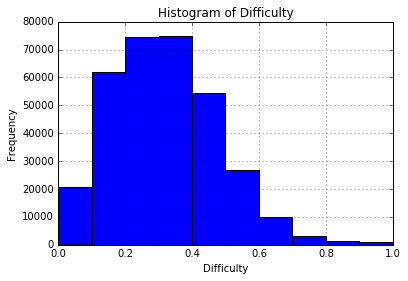

In [20]:
# hisogtam of difficulty
input_data['difficulty'].hist()
plt.title('Histogram of Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')

In [21]:
opp_count = input_data['per_corr'] + input_data['per_incorr']

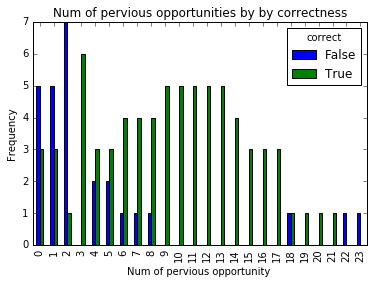

In [22]:
pd.crosstab(opp_count[:100], input_data['correct'][:100].astype(bool)).plot(kind='bar')
plt.title('Num of pervious opportunities by by correctness')
plt.xlabel('Num of pervious opportunity ')
plt.ylabel('Frequency')

In [23]:
all_features = input_data.columns.tolist()
label = 'correct'
all_features.remove(label)
predictors = all_features
categorical_features = ['seq_id']

In [24]:
model = LogisticRegression()
classification_model(model, input_data, predictors, label, categorical_features)

auc: 0.722690787824
r2: 0.139539887759
rmse: 0.440614457549
